In [1]:
using CSV
using DataFrames
using LaTeXStrings
using Plots; pgfplotsx()
using Statistics

In [2]:
# un-comment and run this cell in order to import the raw data as downloaded from the cluster and aggregate in a single dataframe `df`
# df = DataFrame()
# for i in 1:100 # loop over job indices as set in the .sh file
#     append!(df, DataFrame(CSV.File("csv/input_firing_rate" * lpad(i, 3, "0") * ".csv")))
# end
# df

In [3]:
# uncomment and run this cell in order to import the aggregated data
df = CSV.read("csv/input_firing_rate.csv", DataFrame)

,filter,rho,mse
,String,Float64,Float64
1,DiagSF,128.0,0.199036
2,DiagSF,4.0,0.487319
3,DiagSF,64.0,0.251936
4,DiagSF,8.0,0.383674
5,DiagSF,16.0,0.294717
6,DiagSF,32.0,0.256544
7,DiagSF,256.0,NaN
8,DiagSF,1.0,0.70513
9,BlockSF,8.0,0.402382


In [4]:
# uncomment and run this cell in order to save the aggregated data
# CSV.write("csv/input_firing_rate.csv", df)

In [5]:
# process data
df2 = groupby(df, [:filter, :rho])
df3 = combine(df2, :mse => mean)
df4 = filter(row -> !isnan(row.mse_mean) && row.mse_mean <= 1, df3)

,filter,rho,mse_mean
,String,Float64,Float64
1,DiagSF,1.0,0.729456
2,DiagSF,2.0,0.613272
3,DiagSF,4.0,0.496868
4,DiagSF,8.0,0.388091
5,DiagSF,16.0,0.298234
6,DiagSF,32.0,0.236065
7,DiagSF,64.0,0.216219
8,DiagSF,128.0,0.233503
9,BlockSF,1.0,0.729832


In [6]:
# uncomment and run this cell in order to save the aggregated data
CSV.write("csv/input_firing_rate_processed.csv", df4)

"csv/input_firing_rate_processed.csv"

In [7]:
ρ_rng = [2^i for i in 0:8]

9-element Vector{Int64}:
   1
   2
   4
   8
  16
  32
  64
 128
 256

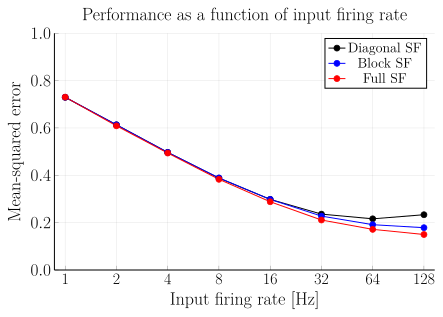

In [8]:
data = filter(row -> row.filter == "DiagSF", df4)
sort!(data, order(:rho))
p = plot(
    data[:, :rho], data[:, :mse_mean], 
    label       = "Diagonal SF", 
    color       = "black",    
    markershape = :circle,
    legend      = :topright,
    xscale      = :log2,
    xticks      = ρ_rng,
    xformatter  = x->Int(x),
    ylims       = (0, 1),
    yticks      = 0:0.2:1,
    xlabel      = "Input firing rate [Hz]",
    ylabel      = "Mean-squared error",
    title       = "Performance as a function of input firing rate",
    titlefont   = (18,),
    tickfont    = (16,),
    guidefont   = (18,),
    legendfontsize = 14
)
data = filter(row -> row.filter == "BlockSF", df4)
sort!(data, order(:rho))
plot!(
    data[:, :rho], data[:, :mse_mean], 
    label             = "Block SF", 
    color             = "blue", 
    markerstrokecolor = "blue",
    markershape       = :circle
)
data = filter(row -> row.filter == "FullSF", df4)
sort!(data, order(:rho))
plot!(
    data[:, :rho], data[:, :mse_mean], 
    label             = "Full SF", 
    color             = "red",
    markerstrokecolor = "red",
    markershape       = :circle
)

In [9]:
savefig("fig/input_firing_rate.pdf")